In [12]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
D = [((2, 3), 1),((1, 1), 1),((1.5, 2), 1),((4, 2), -1),((3.5, 1), -1),((2, 0), -1)]
svc = SVC(kernel='linear')
model = svc.fit([x for x, y in D], [y for x, y in D])

In [13]:
print('coef =', model.coef_)
print('intercept =', model.intercept_)
print('support_vectors =', model.support_vectors_)
print('support =', model.support_)
print('alphas =', [1,1])
print('dual_coef =', model.dual_coef_)

coef = [[-1.  1.]]
intercept = [1.]
support_vectors = [[2. 0.]
 [1. 1.]]
support = [5 1]
alphas = [1, 1]
dual_coef = [[-1.  1.]]


In [5]:
def f(x):
    val  = np.dot(np.array(model.coef_[0]), np.array(x)) + model.intercept_[0]
    if val >=1:
        return 1
    else:
        return -1
for d in D:
    print('f({}) = {}'.format(d[0], f(d[0])))

f((2, 3)) = 1
f((1, 1)) = 1
f((1.5, 2)) = 1
f((4, 2)) = -1
f((3.5, 1)) = -1
f((2, 0)) = -1


In [6]:
w = model.coef_[0]
print('w =', w)

w = [-1.  1.]


In [11]:
#margin
def hyperplane_dist(x):
    return f(x)/np.linalg.norm(w)
print('support vector distance_1 :', hyperplane_dist(model.support_vectors_[0]))
print('support vector distance_2 :', hyperplane_dist(model.support_vectors_[1]))
print('margin:', hyperplane_dist(model.support_vectors_[1])- hyperplane_dist(model.support_vectors_[0]))
print(2/np.linalg.norm(w))

support vector distance_1 : -0.7071067811865475
support vector distance_2 : 0.7071067811865475
margin: 1.414213562373095
1.414213562373095


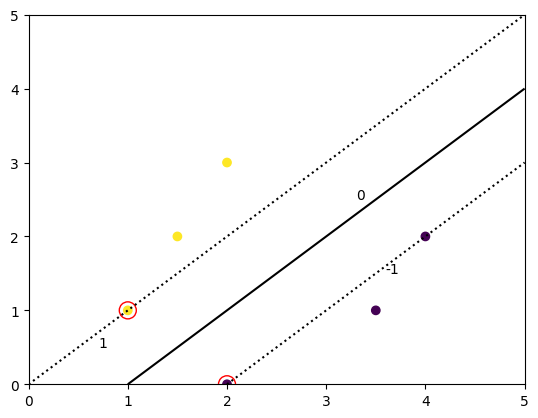

In [6]:
colors = [y for x, y in D]
x,y = np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100))
plt.scatter([x[0] for x, y in D], [x[1] for x, y in D], marker='o', c=colors)
plt.contour(x, y, w[0]*x + w[1]*y + model.intercept_[0], [-1,0,1], colors='k',linestyles=[':', '-', ':'])
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=150, facecolors='none', edgecolors='r')
plt.text(0.7, 0.5, '1', color='k');
plt.text(3.6, 1.5, '-1', color='k');
plt.text(3.3, 2.5, '0', color='k');

In [ ]:
import numpy as np

def calculate_w(alpha, X):
    K = np.dot(X, X.T)
    w = np.dot(K, alpha)
    return w



In [ ]:
def prediction(x, X, y, alpha):
    '''
    x: the sample to predict (numpy array of shape (2,))
    X: training vectors (numpy array of shape (n, 2))
    y: training outputs (numpy array of shape (n,))
    alpha: alpha coefficients (numpy array of shape (n,))
    returns the value of the KRR model evaluated on x
    '''
    result = sum(alpha[i] * kernel(x, X[i]) for i in range(len(X)))
    return result